# Machine Learning Assignment - 2
   

## Anirudh A (2018B4A70936H), Ruthvik Reddy (2018B4A70701H)
# Ranksum Test


In [4]:
# Files 1-56: Original Data
# Files 57-112: Ranksum
import numpy as np
from scipy import stats
from numpy import genfromtxt
fileloc = 'C:/Users/Dell/Downloads/Assignment2/data/'

p=np.zeros((56,nof))

for i in range(1,57):
    fname=fileloc+str(i)+'.csv'
    data=np.genfromtxt(fname,delimiter=',')
    lab=data[:,-1]
    fet=data[:,0:-1]
    nof=np.shape(fet)[1]
    id1=np.where(lab==0)
    id2=np.where(lab>0)
    
    for j in range(0,nof):
        fv=data[:,j]
        fv0=fv[id1[0]]
        fv1=fv[id2[0]]
        w,p[i-1,j]=stats.ranksums(fv0,fv1)
    in1=np.where(p[i-1,:]<=0.05)
    datan=data[:,in1[0]]
    data=np.concatenate((datan,lab.reshape(-1,1)), axis=1)
    fname=fileloc+str(56+i)+".csv"
    np.savetxt(fname,data, delimiter=',', fmt='%f')

In [5]:
fname=fileloc+'pvalue.csv'
np.savetxt(fname,p, delimiter=',', fmt='%f')

In [54]:
p1 = np.zeros((56,nof))
for i in range(1,57):
    for j in range(0,nof):
        if p[i-1,j]<=0.05:
            p1[i-1,j]=1 
            
p1

array([[1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.]])

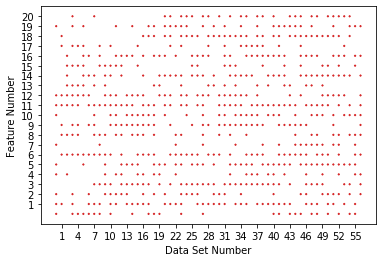

<Figure size 432x288 with 0 Axes>

In [100]:
import matplotlib.pyplot as plt
x = np.arange(57)
y = np.arange(21)
x, y = np.meshgrid(x,y)

plt.scatter(x,y,p1, c='#d62728', marker="D")
plt.yticks(np.arange(1,21,1))
plt.xticks(np.arange(1,56,3))
#plt.grid(True)
plt.xlabel("Data Set Number")
plt.ylabel("Feature Number")
plt.show()
fna=fileloc+"scatter.png"
pyplot.savefig(fna)

# Principal Component nalysis

In [6]:
# Files 113-168: PCA
from sklearn.decomposition import PCA
for i in range(1,57):
    fname=fileloc+str(i)+'.csv'
    df=np.genfromtxt(fname,delimiter=',')
    pca = PCA(n_components=5)
    pca.fit(df[:,0:-1])
    data=pca.transform(df[:,0:-1])
    data=np.concatenate((data,df[:,-1].reshape(-1,1)), axis=1)
    fname=fileloc+str(56*2+i)+".csv"
    np.savetxt(fname,data, delimiter=',', fmt='%f')

# Gini Split

In [7]:
# Files 169-224: Gini
from sklearn.cluster import KMeans
def ginical(fv,lab):
    kmeans = KMeans(n_clusters=2, random_state=0).fit(fv.reshape(-1, 1))
    cl=kmeans.labels_
    in1=np.where(cl==0)
    in2=np.where(cl==1)
    if len(in1[0])==0 or len(in2[0])==0:
        return 0.5
    lab0=lab[in1[0]]
    lab1=lab[in2[0]]
    n00=len(np.where(lab0==0)[0])
    n01=len(np.where(lab0>0)[0])
    n10=len(np.where(lab1==0)[0])
    n11=len(np.where(lab1>0)[0])
    p00=n00/(n00+n01)
    p01=n01/(n00+n01)
    p10=n10/(n10+n11)
    p11=n11/(n10+n11)
    p0=1-p00*p00-p01*p01
    p1=1-p01*p01-p11*p11
    gv=(len(lab0)/len(cl))*p0+(len(lab1)/len(cl))*p1
    return gv

In [75]:
for i in range(1,57):
    fname=fileloc+str(i)+'.csv'
    data=np.genfromtxt(fname,delimiter=',')
    nof=np.shape(data[:,0:-1])[1]
    gv=np.zeros((nof))
    for j in range(0,nof):
        gv[j]=ginical(data[:,j],data[:,-1])
    #a = [1,3,5,2,6,7]
    b=np.argsort(gv)
    datan=data[:,b[0:5]]
    data=np.concatenate((datan,data[:,-1].reshape(-1,1)), axis=1)
    fname=fileloc+str(56*3+i)+".csv"
    np.savetxt(fname,data, delimiter=',', fmt='%f')

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to dupli

# Naive Bayes Classifier and Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [11]:
from sklearn.preprocessing import MinMaxScaler
def normalizedata(X_train):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    return X_train

In [12]:
def model1(trdata,tsdata,tract):
    model = BernoulliNB()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    pred1=model.predict_proba(tsdata)
    return pred,pred1
def model2(trdata,tsdata,tract):
    model = MultinomialNB()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    pred1=model.predict_proba(tsdata)
    return pred,pred1
def model3(trdata,tsdata,tract):
    model = GaussianNB()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    pred1=model.predict_proba(tsdata)
    return pred,pred1
def model4(trdata,tsdata,tract):
    model = DecisionTreeClassifier()
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    pred1=model.predict_proba(tsdata)
    return pred,pred1
def model5(trdata,tsdata,tract):
    model = DecisionTreeClassifier(criterion='entropy')
    model.fit(trdata,tract)
    pred= model.predict(tsdata)
    pred1=model.predict_proba(tsdata)
    return pred,pred1

In [13]:
from sklearn.model_selection import KFold
kf = KFold(5)

In [76]:
for i in range(1,225):
    #print(i)
    fname=fileloc+str(i)+'.csv'
    data=np.genfromtxt(fname,delimiter=',')
    X=data[:,0:-1]
    Y=data[:,-1]
    in1=np.where(Y>0)
    Y[in1[0]]=1
    X=normalizedata(X)
    predv=np.zeros((np.shape(X)[0],6))
    predv1=np.zeros((np.shape(X)[0],11))
    for train_index, test_index in kf.split(X):
        trdata=X[train_index,:]
        tsdata=X[test_index,:]
        tract=Y[train_index]
        tsact=Y[test_index]
        predv[test_index,0],predv1[test_index,0:2]=model1(trdata,tsdata,tract)
        predv[test_index,1],predv1[test_index,2:4]=model2(trdata,tsdata,tract)
        predv[test_index,2],predv1[test_index,4:6]=model3(trdata,tsdata,tract)
        predv[test_index,3],predv1[test_index,6:8]=model4(trdata,tsdata,tract)
        predv[test_index,4],predv1[test_index,8:10]=model5(trdata,tsdata,tract)
        predv[test_index,5]=tsact
        predv1[test_index,10]=tsact
    fname=fileloc+'pred'+str(i)+".csv"
    np.savetxt(fname,predv, delimiter=',', fmt='%f')    
    fname=fileloc+'predv'+str(i)+".csv"
    np.savetxt(fname,predv1, delimiter=',', fmt='%f')   

# Accuracy and F Measure

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [77]:
accv=np.zeros((224,5))
fmea=np.zeros((224,5))
for i in range(1,225):
    fname=fileloc+'pred'+str(i)+".csv"
    data=np.genfromtxt(fname,delimiter=',')
    for j in range(0,5):
        accv[i-1,j]=accuracy_score(data[:,-1],data[:,j])
        fmea[i-1,j]=f1_score(data[:,-1],data[:,j])
fname=fileloc+'acc.csv'
np.savetxt(fname,accv*100, delimiter=',', fmt='%f')    
fname=fileloc+'fmea.csv'
np.savetxt(fname,fmea, delimiter=',', fmt='%f')         

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
rocv=np.zeros((224,5))
for i in range(1,225):
    fname= fileloc+'predv'+str(i)+'.csv'
    data=np.genfromtxt(fname,delimiter=',')
    y1=data[:,-1]
    for j in range(0,5):
        b=data[:,2*j+1]
        fpr, tpr, _ = roc_curve(y1, b)
        rocv[i-1,j]=auc(fpr, tpr)
fname=fileloc+'auc.csv'    
np.savetxt(fname,rocv, delimiter=',', fmt='%f')          

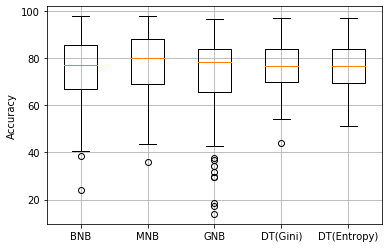

In [82]:
from matplotlib import pyplot
pyplot.boxplot(accv*100,labels=['BNB','MNB','GNB','DT(Gini)','DT(Entropy)'])
pyplot.grid(True)
pyplot.ylabel('Accuracy')
fna=fileloc+"acc.png"
pyplot.savefig(fna)

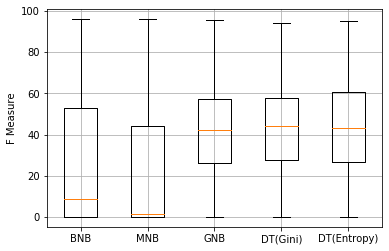

In [79]:
pyplot.boxplot(fmea*100,labels=['BNB','MNB','GNB','DT(Gini)','DT(Entropy)'])
pyplot.grid(True)
pyplot.ylabel('F Measure')
fna=fileloc+"fmea.png"
pyplot.savefig(fna)

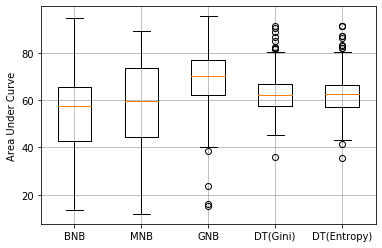

In [83]:
pyplot.boxplot(rocv*100,labels=['BNB','MNB','GNB','DT(Gini)','DT(Entropy)'])
pyplot.grid(True)
pyplot.ylabel('Area Under Curve')
fna=fileloc+"auc.png"
pyplot.savefig(fna)

# p-Values

In [84]:
pvalue=np.zeros((5,5))
for i in range(0,5):
    for j in range(0,5):
        w,pvalue[i,j]=stats.ranksums(accv[:,i],accv[:,j])

In [85]:
pvalue

array([[1.        , 0.12983466, 0.14529088, 0.51716559, 0.54540428],
       [0.12983466, 1.        , 0.00331986, 0.01359055, 0.01684008],
       [0.14529088, 0.00331986, 1.        , 0.5883931 , 0.57563178],
       [0.51716559, 0.01359055, 0.5883931 , 1.        , 0.98020325],
       [0.54540428, 0.01684008, 0.57563178, 0.98020325, 1.        ]])

In [86]:
fname=fileloc+'pval_tec.csv'    
np.savetxt(fname,pvalue, delimiter=',', fmt='%f')    

In [92]:
np.shape(accv)

(224, 5)

In [93]:
acvf=np.zeros((56*5,4))
for i in range(0,4):
    for j in range(0,56):
        acvf[5*j:5*(j+1),i]=accv[56*i+j,:]        

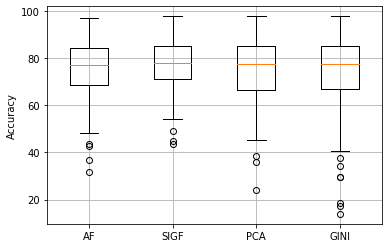

In [94]:
from matplotlib import pyplot
pyplot.boxplot(acvf*100,labels=['AF','SIGF','PCA','GINI'])
pyplot.grid(True)
pyplot.ylabel('Accuracy')
fna=fileloc+"acc_fst.png"
pyplot.savefig(fna)
#pyplot.close()

In [95]:
pvalue=np.zeros((4,4))
for i in range(0,4):
    for j in range(0,4):
        w,pvalue[i,j]=stats.ranksums(acvf[:,i],acvf[:,j])

In [96]:
fname=fileloc+'pval_fst.csv'    
np.savetxt(fname,pvalue, delimiter=',', fmt='%f')  